<a href="https://colab.research.google.com/github/laukikupadhye/StatisticalAnalysis/blob/main/analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistical Analysis on customer order data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
from scipy import stats as st
from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import accuracy_score as accs
from sklearn.metrics import precision_score as prec


In [ ]:
data =pd.read_csv("/content/screening_exercise_orders_v201810.csv")
data.head(5)

,customer_id,gender,date,value,predicted_gender
0,1000,0,2017-01-01 00:11:31,198.5,1
1,1001,0,2017-01-01 00:29:56,338.0,1
2,1002,1,2017-01-01 01:30:31,733.0,1
3,1003,1,2017-01-01 01:34:22,772.0,1
4,1004,0,2017-01-01 03:11:54,508.0,1


In [ ]:
data['date']=pd.to_datetime(data['date'])

#Which are the most valueable customers (finding top 10 customers)?

In [ ]:
#data.info()
dataA=data.groupby(['customer_id','gender'],as_index=False).agg(most_recent_order_date=('date','max'),order_count=('date','count')).copy()
dataA.sort_values('customer_id').head(10)

,customer_id,gender,most_recent_order_date,order_count
0,1000,0,2017-01-01 00:11:31,1
1,1001,0,2017-01-01 00:29:56,1
2,1002,1,2017-02-19 21:35:31,3
3,1003,1,2017-04-26 02:37:20,4
4,1004,0,2017-01-01 03:11:54,1
5,1005,1,2017-12-16 01:39:27,2
6,1006,1,2017-05-09 15:27:20,3
7,1007,0,2017-01-01 15:59:50,1
8,1008,0,2017-12-17 05:47:48,3
9,1009,1,2017-01-01 19:27:17,1


#What is the trend of order by weeks?

In [ ]:
dataB=data.copy()
dataB['weekNumber']=dataB['date'].dt.isocalendar().week.copy()
dataB=dataB.groupby(['weekNumber'],as_index=False).agg(order_count=('customer_id','count')).sort_values('order_count',ascending=False).reset_index().copy()

Text(0, 0.5, 'Counts')

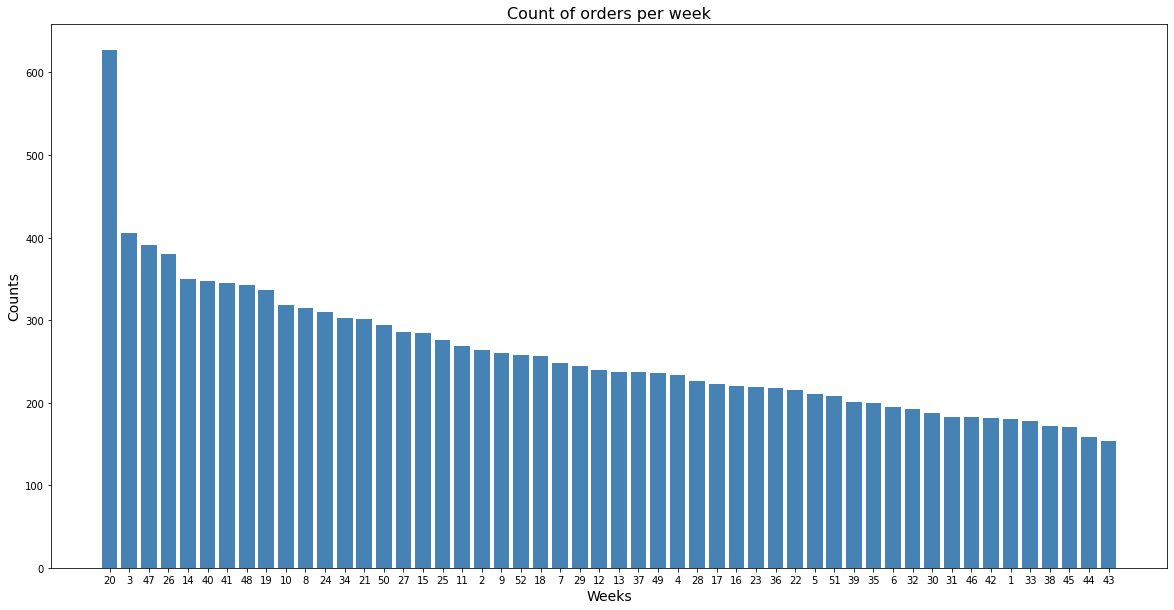

In [ ]:
fig , ax= plt.subplots(figsize=(20,10))

ax.bar(dataB.index,dataB.order_count,color='steelblue')
ax.set_xticks(range(0,52))
ax.set_xticklabels([x for x in dataB.weekNumber])
plt.title('Count of orders per week',fontsize=16)

plt.xlabel('Weeks',fontsize=14)
plt.ylabel('Counts',fontsize=14)

#Is there a significant difference between two genders, with respect to their mean order count?
## To find the significance level of two means, appling statistical analysis, hypothesis testing to conclude

Initial Assumptions:

1.   H0 (null hypothesis)=0  - difference is not significant
2.   H1 (Alternative hypothesis) != 0   - difference is significant
3.   p=0.05  - significance level (alpha value)


For this will need to calculate Mean, Standard Deviation 







In [ ]:
dataC=data.groupby('gender',as_index=False).agg(mean=('value','mean'),sd=('value','std'),ncount=('date','count')).copy()
dataC

,gender,mean,sd,ncount
0,0,363.890006,396.533215,6759
1,1,350.708361,377.504737,6712


In [ ]:
#taking out all values in variable to ease of further calculation

mean0=dataC[['mean']][(dataC.gender==0)].values[0][0]
mean1=dataC[['mean']][(dataC.gender==1)].values[0][0]
sd0=dataC[['sd']][(dataC.gender==0)].values[0][0]
sd1=dataC[['sd']][(dataC.gender==1)].values[0][0]
n0=dataC[['ncount']][(dataC.gender==0)].values[0][0]
n1=dataC[['ncount']][(dataC.gender==1)].values[0][0]


In [ ]:
mean_diff=mean0-mean1
standard_error=np.sqrt(sd0**2/n0 + sd1**2/n1)
t_value=mean_diff/standard_error
p_value =st.t.sf(np.abs(t_value),(n0-1+n1-1))*2
#print('t=',t_value)
print('p=',p_value)

print('Significant difference' if p_value<0.05 else 'No significant difference')

p= 0.048162926726967335
Significant difference


Here we clearly see the value of probability is falling under rejection region that is **p_value<0.05**. Hence, we can say that, for alpha value 0.05 there is significant difference between two means. 

#What is the quality of predictor model which predicted gender on buying pattern?
Generating confusion matrix to calculate the accuracy of prediction model

Before doing that, I am taking predicted values only for most recent order made by users.


In [ ]:
dataD1=data.groupby(['customer_id','gender'],as_index=False).agg(date=('date','max')).copy()
dataD=pd.merge(dataD1,data[['date','predicted_gender']],on=['date'])

#testing of data join with specific customer_id which has more than one orders (compared manually with excel)
dataD[(dataD.customer_id==1015)]

,customer_id,gender,date,predicted_gender
15,1015,0,2017-09-21 19:58:04,0


Join in working fine as of sanity testing

In [ ]:
cm(dataD.gender, dataD.predicted_gender)

array([[2191, 2221],
       [ 896, 3517]])

In [ ]:
#Accuracy of the prediction model
print('Accuracy is ',round(accs(dataD.gender, dataD.predicted_gender)*100,2),'%')

Accuracy is  64.68 %


With the prebuilt function the accuracy is ~64%, which means at any given time, the chance of getting correct value from prediction model is only 64% 

This show the reliability of model.

In [ ]:
#Precision 
print('Precision is ',round(prec(dataD.gender, dataD.predicted_gender)*100,2),'%')

Precision is  61.29 %


With this value we can say, out of all positive prediction, only ~61% are correct. Which is very low number for any prediction model.